# Imports
Numpy import for array processing, python doesn’t have built in array support. The feature of working with native arrays can be used in python with the help of numpy library.

Pandas is a library of python used for working with tables, on importing the data, mostly data will be of table format, for ease manipulation of tables pandas library is imported

Matplotlib is a library of python used to plot graphs, for the purpose of visualizing the results we would be plotting the results with the help of matplotlib library.

Math import is just used to square the numerical values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Reading the dataset from data
In this line of code using the read_excel method of pandas library, the dataset has been imported from data folder and stored in dataset variable.

In [2]:
dataset = pd.read_csv(r'..\\data\\auto_insurance.csv')

On viewing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

In [3]:
dataset.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


# Creating Dependent and Independent variables
The X Column from the dataset is extracted into an X variable of type numpy, similarly the y variable
X is an independent variable 
Y is dependent variable Inference

In [4]:
X = dataset['X'].values
y = dataset['Y'].values

On execution of first line would result in a pandas Series Object
On using values attribute it would result in an numpy array

In [5]:
print(type(dataset['X']))
print(type(dataset['X'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


# Visualizing the data 
The step is to just see how the dataset is 
On visualization the data would appear something like this
The X and Y attributes would vary based on dataset.
Each point on the plot is a data point showing the respective Number of Claims on x-axis and Total Payment on y-axis

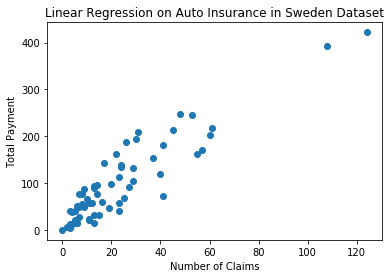

In [6]:
title='Linear Regression on Auto Insurance in Sweden Dataset'
x_axis_label = 'Number of Claims'
y_axis_label = 'Total Payment'
plt.scatter(X,y)
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Splitting the data into training set and test set
We are splitting the whole dataset into training and test set where training set is used for fitting the line to data and test set is used to check how good the line if for the data.
>This splitting can be dont with scikit learns test train split or manully by below code

In [7]:
X_train,X_test = np.split(X,indices_or_sections = [int(len(X)*0.2)])
y_train,y_test = np.split(y,indices_or_sections = [int(len(X)*0.2)])

# Reshaping the numpy arrays since the scikit learn model expects 2-D array in further code
In further the scikit learn model would be expecting a 2-D array of shape (length,1).

In [8]:
X_train_fw = np.reshape(X_train,newshape = (-1,1))
y_train_fw = np.reshape(y_train,newshape = (-1,1))
X_test_fw = np.reshape(X_test,newshape = (-1,1))
y_test_fw = np.reshape(y_test,newshape = (-1,1))

The code was just to convert a single dimensional array into a 2-D array where each element is an array.

In [9]:
print('Before Reshaping',np.shape(X))
print('After Reshaping',np.shape(X_train))

Before Reshaping (63,)
After Reshaping (12,)


# Computing the values of sigma
As per the derivation formula we are computing the values of sigma x sigme x^2 sigma y simg x*y
n is the number of terms in the dataset

In [10]:
sigma_X = sum(X_train)
sigma_y = sum(y_train)
sigma_xy = sum(np.multiply(X_train,y_train))
sigma_X_square = sum(np.square(X_train))
n = len(X_train)

# Computing the values of slope and intercept 
As our linear regression line requires a slope and intercept
we are computing their values using statistical formulas

In [11]:
m_numerator = (n*sigma_xy)-(sigma_X*sigma_y)
m_denominator =  n*sigma_X_square - math.pow(sigma_X,2)
m = m_numerator/m_denominator

c_numerator = (sigma_y*sigma_X_square)-(sigma_xy*sigma_X)
c_denominator = (n*sigma_X_square) - math.pow(sigma_X,2)
c = c_numerator/c_denominator

# Importing the linear model from sklearn framework
From scikit learn Library LinearRegression is imported. Lr is an object of LinearRegression.
The process of training is done in the fit method, our dependent and independent variable are fed into to the fit method in which it would try to fit a line to the data provided.

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X = X_train_fw, y = y_train_fw)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Results
`Line 1` By the knowing the slope and intercept values of linear regression model we are trying to predict the values of test data. Y_pred variable contains all the predicted y-values of the test x-values.

`Line 2` By the trained linear regression model we are trying to predict the values of test data. Y_pred variable contains all the predicted y-values of the test x-values.

In [13]:
y_pred_stat = X_test*m + c
y_pred_fw = lr.predict(X_test_fw)

# Visualizing the Results
As we have predicted the y-values for a set of x-values we are visualizing the results to check how good did our line fit for our predictions.
# Plotting each result individually
The plot shows the blue points are the data points are actual values where the cyan and Green lines is the predictions

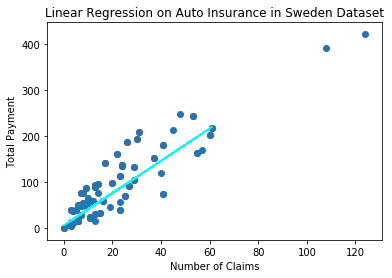

In [14]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred_fw,c='cyan',label='framework')
plt.scatter(X,y)
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

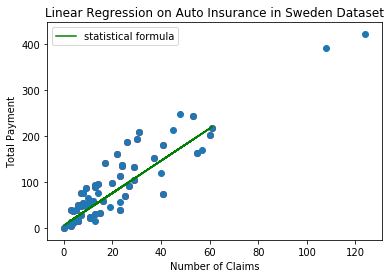

In [15]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred_stat,c='green',label='statistical formula')
plt.scatter(X,y)
plt.title(title)
plt.legend()
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Combining the results
The plot shows the blue points are the data points are actual values where the lines is the predictions
> Note: In the below graph one is was hidden over the other

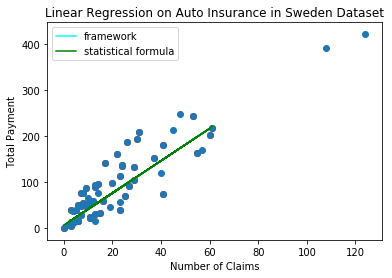

In [16]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred_fw,c='cyan',label='framework')
plt.plot(X_test,y_pred_stat,c='green',label='statistical formula')
plt.scatter(X,y)
plt.title(title)
plt.legend()
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()